# Séance projet 3

## 1. Préparation du travail
Importons tous les modules nécessaires.

In [74]:
# Imports nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Chargeons le jeu de données prétraité fourni à l'issue de la séance 1 qui se trouve dans le fichier `JO_clean.csv` et affichons les 5 premières lignes pour vérifier que le chargement a été effectué correctement. 

Pensez à télécharger au préalable le fichier `JO_clean.csv` et à le placer dans le même dossier que votre notebook.

Si vous avez importé le notebook sur Google Colab, il faut exécuter la cellule ci-dessous au préalable pour télécharger votre jeu de données dans votre environnement de travail sur Colab (inutile dans le cas où vous exécutez le notebook sur votre propre machine) :

In [75]:
# Chargement du jeu de données et affichage des 5 premières lignes
DATA = pd.read_csv('JO_clean.csv')
DATA.head(n=5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


## 2. Etude du jeu de données en fonction du temps

#### Etude des JO 2016

*Question S3-1* : Afficher le nombre de participants de chaque pays lors des JO 2016.
> Plusieurs façons de faire : 
* Représentation numérique en combinant les fonctions groupby et size. 
* Représentation numérique en utilisant la fonction value_counts.
* Représentation graphique avec un diagramme à batons

In [76]:
# Méthode 1 : représentation numérique avec groupby et size

DATA_2016 = DATA[DATA["Year"]==2016]

result = DATA_2016.groupby("country").size().sort_values(ascending=False)

print (result)

country
USA                                 718
Brazil                              581
China                               546
Germany                             535
Australia                           512
                                   ... 
Solomon Islands                       1
Timor-Leste                           1
Togo                                  1
Democratic Republic of the Congo      1
Equatorial Guinea                     1
Length: 200, dtype: int64


In [77]:
# Méthode 2 : représentation numérique avec la fonction value_counts

country = pd.Series(DATA_2016["country"])

result2 = country.value_counts()

print (result2)

USA                                 718
Brazil                              581
China                               546
Germany                             535
Australia                           512
                                   ... 
Timor-Leste                           1
Togo                                  1
Equatorial Guinea                     1
Solomon Islands                       1
Democratic Republic of the Congo      1
Name: country, Length: 200, dtype: int64


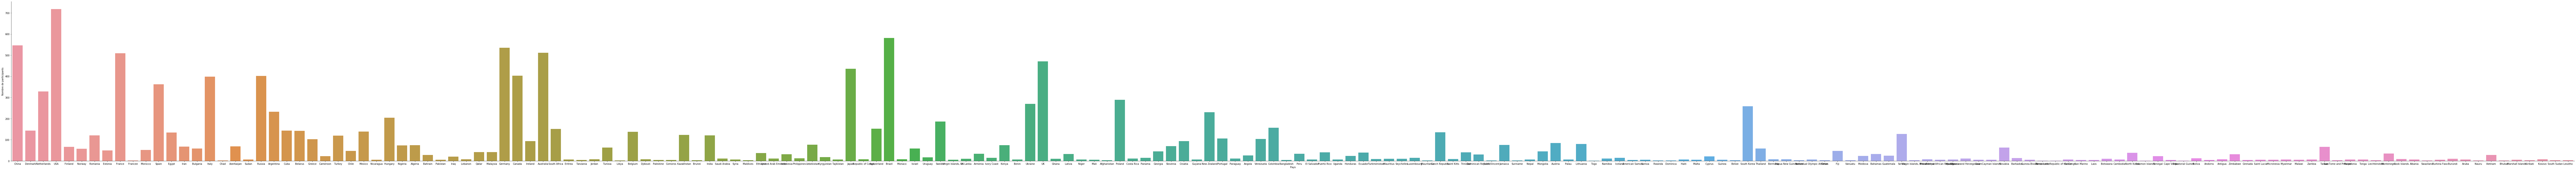

In [78]:
# Méthode 3 : représentation graphique avec un diagramme à batons

sns.catplot(x="country", kind="count", data = DATA_2016, height = 10, aspect = 15)
plt.xlabel('Pays')
plt.ylabel('Nombre de participants')
plt.show()

#### Étude des JO 1904

*Question S3-2* : Faire de même avec l'édition de 1904. Combien de pays ont participé à cette édition ? Ce résultat vous parait-il cohérent ? 

In [79]:
DATA_1904 = DATA[DATA["Year"]==1904]

result3 = DATA_1904.groupby("country").size()

print (result3)

country
Canada      7
Cuba        1
Germany    10
Greece      3
Hungary     2
UK          1
USA        95
dtype: int64


In [80]:
DATA_1904.groupby("country").size().sum()

119

====> Le nombre de **participations** *(119)* ainsi que le nombre de **pays participants** *(7)* semble étrange

*Question S3-3* : On pourra regarder sur le jeu de données original (non prétraité) et en tirer des conclusions.


In [81]:
raw_DATA = pd.read_csv("JO.csv")

raw_DATA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [82]:
raw_DATA_1904 = raw_DATA[raw_DATA["Year"] == 1904]

result4 = raw_DATA_1904.groupby("country").size()

print (result4)

country
Australia          6
Austria            7
Canada            62
Cuba               6
France             2
Germany           55
Greece            17
Hungary            9
Italy              1
Norway             6
South Africa       8
Switzerland        7
UK                 6
USA             1109
dtype: int64


In [83]:
raw_DATA_1904.groupby("country").size().sum()

1301

========> Cette fois-ci le nombre de **participations** *(1301)* et de **pays participants** *(14)* semblent plus cohérent. Ceci est dû au fait que le fichier original contient toutes les participations contrairement au nouveau fichier qui ne contient que les lignes sans valeurs manquantes. 

### Participations féminines vs. masculines aux JO d'hiver

In [84]:
#Extraire les lignes des JO d'hiver

winter = raw_DATA[raw_DATA["Season"]=="Winter"]

winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China
10,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze,China


*Question S3-4* : Construire un dataframe comptant le nombre de participations masculines aux JO d'hiver par années, puis faire un second dataframe comptant le nombre de participations féminines aux JO d'hiver par années.

In [85]:
#Générer un dataframe des participations masculines

male = winter[winter["Sex"]=="M"]

male_year = male.groupby("Year").size().reset_index().rename(columns={0:'Male_athletes'})

male_year.head()

,Year,Male_athletes
0,1924,443
1,1928,549
2,1932,330
3,1936,814
4,1948,942


In [86]:
#Générer un dataframe des participations masculines

female = winter[winter["Sex"]=="F"]

female_year = female.groupby("Year").size().reset_index().rename(columns={0:'Female_athletes'})

female_year.head()

,Year,Female_athletes
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133


*Question S3-5* : Utiliser la procédure merge pour créer une table unique avec les nombres respectifs de participations masculines et féminines par année aux JO d'hiver.
Tracer un graphe du nombre de participations 
féminines en fonction du nombre de participations masculines (un point par année).

In [87]:
# Participations masculines et féminines par année

winter_year = pd.merge(male_year,female_year, how = "outer")

winter_year.head()

,Year,Male_athletes,Female_athletes
0,1924,443,17
1,1928,549,33
2,1932,330,22
3,1936,814,81
4,1948,942,133


Text(0, 0.5, 'Participations féminines')

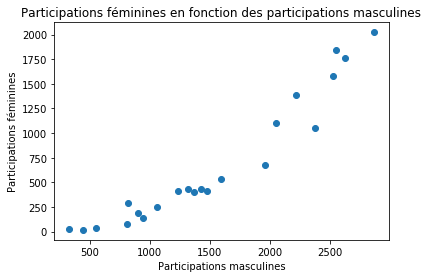

In [88]:
# Tracé de participations fémininines en fonction des masculines

plt.scatter(winter_year["Male_athletes"],winter_year["Female_athletes"])

plt.title("Participations féminines en fonction des participations masculines")

plt.xlabel("Participations masculines")

plt.ylabel("Participations féminines")

# Chaque point est pour une année

### Nombres de médaillés par rapport aux participants aux JO d'hiver

*Question S3-6* : Y a-t-il une dépendance entre le nombre de médaillés et le nombre de participants, par pays et par année ?
Tracez un point (nombre de participants, nombre de médaillés) par année et par pays.
Attention lors de la fusion/jointure à ne pas perdre les lignes de pays n'ayant pas de médaillés cette année là, à ne pas laisser de valeurs manquantes !
Vérifiez le point d'un pays avec plus de 300 participants et plus de 90 médailles.

In [89]:
# Création d'un DataFrame des participants, regroupés par pays et par année

participants = raw_DATA.groupby(["country","Year"]).size().reset_index().rename(columns={0:"Participants"})

participants.head()

,country,Year,Participants
0,Afghanistan,1936,16
1,Afghanistan,1948,25
2,Afghanistan,1956,12
3,Afghanistan,1960,16
4,Afghanistan,1964,8


In [90]:
# Création d'un DataFrame des médaillés, regroupés par pays et par année

medals = raw_DATA[raw_DATA["Medal"].notnull()]

medals_per_year_country = medals.groupby(["country","Year"]).size().reset_index().rename(columns={0:"Medals"})

medals_per_year_country.head()

,country,Year,Medals
0,Afghanistan,2008,1
1,Afghanistan,2012,2
2,Algeria,1984,2
3,Algeria,1992,2
4,Algeria,1996,3


In [91]:
# Combinaison des deux DataFrames précédents

medals_participants= pd.merge(participants,medals_per_year_country,how="outer")

medals_participants.head()

,country,Year,Participants,Medals
0,Afghanistan,1936,16,NaN
1,Afghanistan,1948,25,NaN
2,Afghanistan,1956,12,NaN
3,Afghanistan,1960,16,NaN
4,Afghanistan,1964,8,NaN


=====> Nous remarquons que les lignes avec valeurs manquantes pour médailles (donc pour les médailles non-remportées) ont bien été prises en compte et figurent bien sur notre nouveau DataFrame

Text(0, 0.5, 'Nombre de médailles')

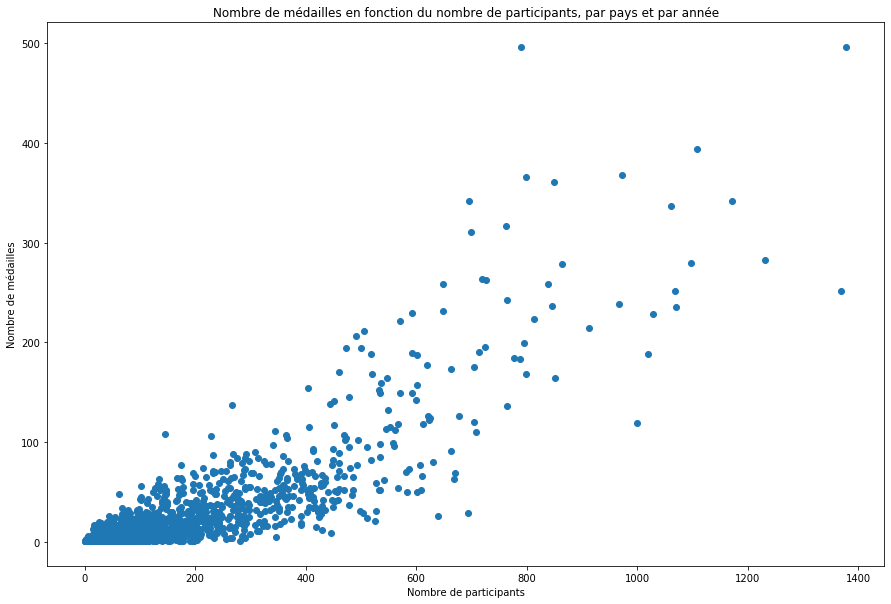

In [92]:
# Représentation graphique (nombre de médailles en fonction du nombre de participants)

plt.figure(figsize=(15,10))

plt.scatter(medals_participants["Participants"],medals_participants["Medals"])

plt.title("Nombre de médailles en fonction du nombre de participants, par pays et par année")

plt.xlabel("Nombre de participants")

plt.ylabel("Nombre de médailles")

# Chaque point est pour une année et pour un pays

In [93]:
medals_participants.sort_values(by=["Participants", "Medals"],ascending=False)

# Classer les valeurs afin de vérifier la cohérence avec le graphe représenté pour les grandes valeurs

,country,Year,Participants,Medals
3078,USA,2012,1378,496.0
3043,UK,2012,1368,252.0
1075,Germany,1972,1232,283.0
1079,Germany,1988,1171,342.0
3048,USA,1904,1109,394.0
...,...,...,...,...
3177,Venezuela,2006,1,NaN
3180,Venezuela,2014,1,NaN
3201,"Virgin Islands, British",2000,1,NaN
3202,"Virgin Islands, British",2004,1,NaN


   # Commentaires libres 

Vous pouvez décrire ci-dessous tout ce que vous avez pu remarquer d’intéressant sur ce jeu de données, ou des problèmes particuliers que vous avez pu rencontrer. N’oubliez pas de commenter et décrire votre code, et de préciser les questions auxquelles il permet de répondre.